In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Using 'strat_skeleton' java package to compute $[linearity,slope,normal,cigfacies]$

In [2]:
# file_path = "../1_build_strat_skeleton/strat_skeleton/data/synthetic/"
# data_shape = [520,300]
file_path = "../1_build_strat_skeleton/strat_skeleton/data/Beagle/"
data_shape = [520,300]
# file_path = "../1_build_strat_skeleton/strat_skeleton/data/Poseidon/"
# data_shape = [568,300]
# file_path = "../1_build_strat_skeleton/strat_skeleton/data/F3/"
# data_shape = [476,300]

seis = np.fromfile(file_path+"seis/0.dat",dtype=np.float32).reshape(data_shape).T
linearity = np.fromfile(file_path+"linearity/0.dat",dtype=np.float32).reshape(data_shape).T
slope = np.fromfile(file_path+"slope/0.dat",dtype=np.float32).reshape(data_shape).T
normal = np.fromfile(file_path+"normal/0.dat",dtype=np.float32).reshape((2,data_shape[0],data_shape[1])).T
cigfacies = np.fromfile(file_path+"cigfacies/0.dat",dtype=np.float32).reshape(data_shape).T
cigfacies2 = np.fromfile(file_path+"cigfacies_enhance/0.dat",dtype=np.float32).reshape(data_shape).T

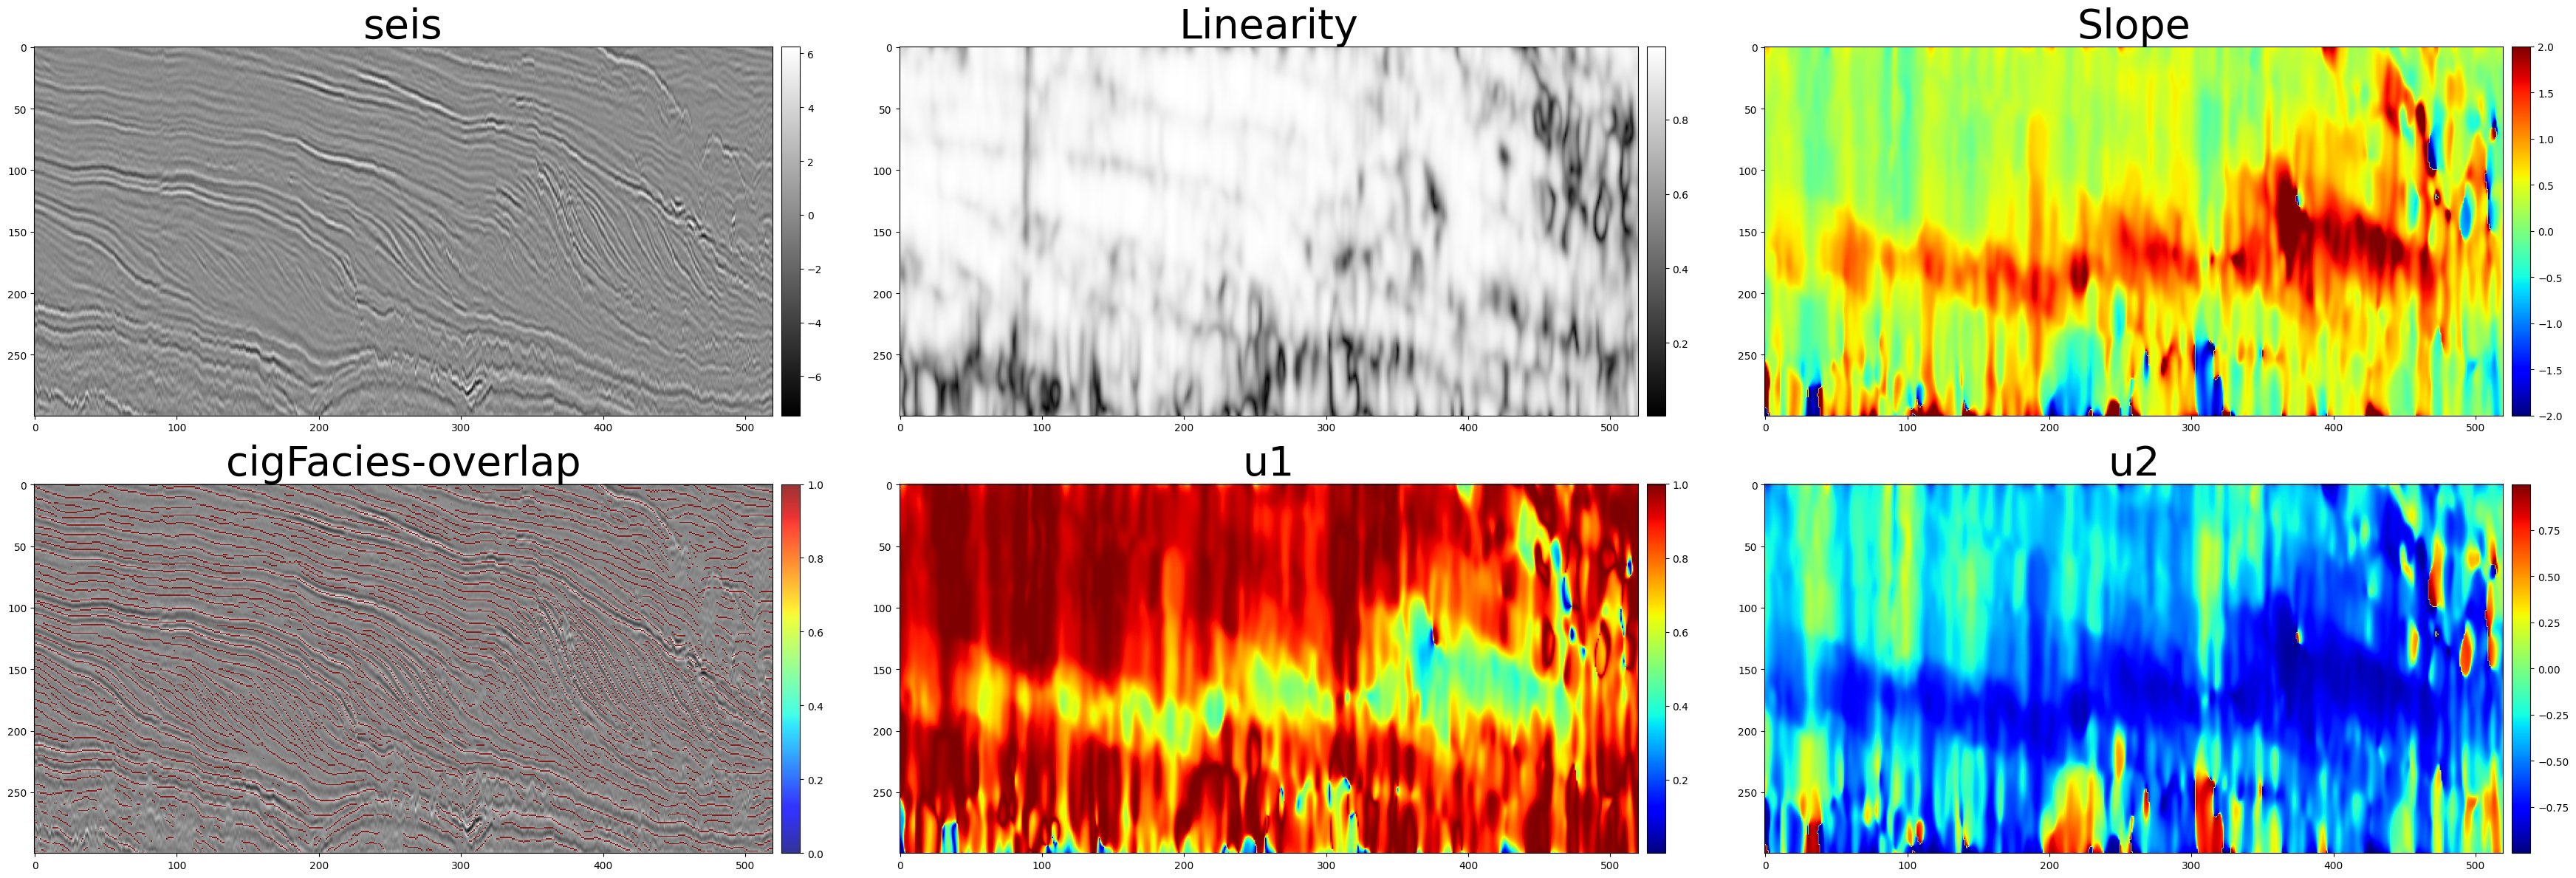

In [3]:
plt.figure(figsize=(36,12))
plt.subplot(2,3,1)
plt.imshow(seis,cmap="gray",aspect="auto")
plt.title("seis",fontsize=40),plt.colorbar(pad=0.01)
plt.subplot(2,3,2)
plt.imshow(linearity,cmap="gray",aspect="auto")
plt.title("Linearity",fontsize=40),plt.colorbar(pad=0.01)
plt.subplot(2,3,3)
plt.imshow(slope,cmap="jet",aspect="auto")
plt.title("Slope",fontsize=40),plt.colorbar(pad=0.01)
plt.subplot(2,3,4)
plt.imshow(seis,cmap="gray",aspect="auto")
cigfacies[cigfacies==0]=np.nan
plt.imshow(cigfacies,vmin=0,vmax=1,cmap="jet",aspect="auto",interpolation="nearest",alpha=0.8)
plt.title("cigFacies-overlap",fontsize=40),plt.colorbar(pad=0.01)
plt.subplot(2,3,5)
plt.imshow(normal[:,:,0],cmap="jet",aspect="auto")
plt.title("u1",fontsize=40),plt.colorbar(pad=0.01)
plt.subplot(2,3,6)
plt.imshow(normal[:,:,1],cmap="jet",aspect="auto")
plt.title("u2",fontsize=40),plt.colorbar(pad=0.01)
plt.tight_layout()

### 2. Saving the new datasets with cigfacies data and normal vectors

In [4]:
# #synthetic
# file_path = "../1_build_strat_skeleton/strat_skeleton/data/synthetic/"
# data_path = "../synthetic/syn_datasets/" # old data without cigfacies and normal
# save_path = "../synthetic/syn_datasets_cigfacies/" # new data with cigfacies and normal
# data_shape = [520,300]
#Beagle
file_path = "../1_build_strat_skeleton/strat_skeleton/data/Beagle/"
data_path = "../field/Beagle_datasets/"
save_path = "../field/Beagle_datasets_cigfacies/" 
data_shape = [520,300]
# #Poseidon
# file_path = "../1_build_strat_skeleton/strat_skeleton/data/Poseidon/"
# data_path = "../field/Poseidon_datasets/"
# save_path = "../field/Poseidon_datasets_cigfacies/" 
# data_shape = [568,300]
# #F3
# file_path = "../1_build_strat_skeleton/strat_skeleton/data/F3/"
# data_path = "../field/F3_datasets/"
# save_path = "../field/F3_datasets_cigfacies/" 
# data_shape = [476,300]

# save new data with cigfacies and normal vectors
data = np.load(data_path+"0.npy",allow_pickle=True).item()
cigfacies = np.fromfile(file_path+"cigfacies/0.dat",dtype=np.float32).reshape(data_shape).T
cigfacies2 = np.fromfile(file_path+"cigfacies_enhance/0.dat",dtype=np.float32).reshape(data_shape).T
slope = np.fromfile(file_path+"slope/0.dat",dtype=np.float32).reshape(data_shape).T
normal = np.fromfile(file_path+"normal/0.dat",dtype=np.float32).reshape((2,data_shape[0],data_shape[1])).T
data["cigfacies"] = cigfacies2
data["slope"] = slope
data["normal"] = normal
data["linearity"] = linearity
np.save(save_path+"0.npy",data)

### 3. Using 'Find_Seeds_Paths' python function to tracking local horizon segments

In [5]:
from Find_Seeds_Paths import pick_seeds_paths
# # Synthetic
# file_path = "../1_build_strat_skeleton/strat_skeleton/data/synthetic/"
# seed_path = "../synthetic/syn_datasets_seeds/"
# horizon_path = "../synthetic/syn_datasets_localhorizon/"
# data_shape = [520,300]
# Beagle
file_path = "../1_build_strat_skeleton/strat_skeleton/data/Beagle/"
seed_path = "../field/Beagle_datasets_seeds/"
horizon_path = "../field/Beagle_datasets_localhorizon/"
data_shape = [520,300]
# # Poseidon
# file_path = "../1_build_strat_skeleton/strat_skeleton/data/Poseidon/"
# seed_path = "../field/Poseidon_datasets_seeds/"
# horizon_path = "../field/Poseidon_datasets_localhorizon/"
# data_shape = [568,300]
# # F3
# file_path = "../1_build_strat_skeleton/strat_skeleton/data/F3/"
# seed_path = "../field/F3_datasets_seeds/"
# horizon_path = "../field/F3_datasets_localhorizon/"
# data_shape = [476,300]

# tracking the local horizon segments
li = np.fromfile(file_path+"linearity/0.dat",dtype=np.float32).reshape(data_shape).T
fx = np.fromfile(file_path+"cigfacies_enhance/0.dat",dtype=np.float32).reshape(data_shape).T
sl = np.fromfile(file_path+"slope/0.dat",dtype=np.float32).reshape(data_shape).T
path = pick_seeds_paths(fx,li,sl)
seed_all = np.zeros((len(path),2))
path_all = np.zeros((len(path),21,21)) 
local_horizons = {}
index = 0
for ei, [[xi,yi],pi,si] in enumerate(path):
    seed_all[ei] = np.array([xi,yi],dtype=np.int64)
    path_all[ei] = np.array(pi,dtype=np.int64) 
    local_horizons[str(index)] = si
    index = index+1
sample = {"seeds":seed_all,"seeds_paths":path_all}
np.save(seed_path+"0.npy",sample) # seeds points
np.save(horizon_path+"0.npy",local_horizons) # local horizon segments

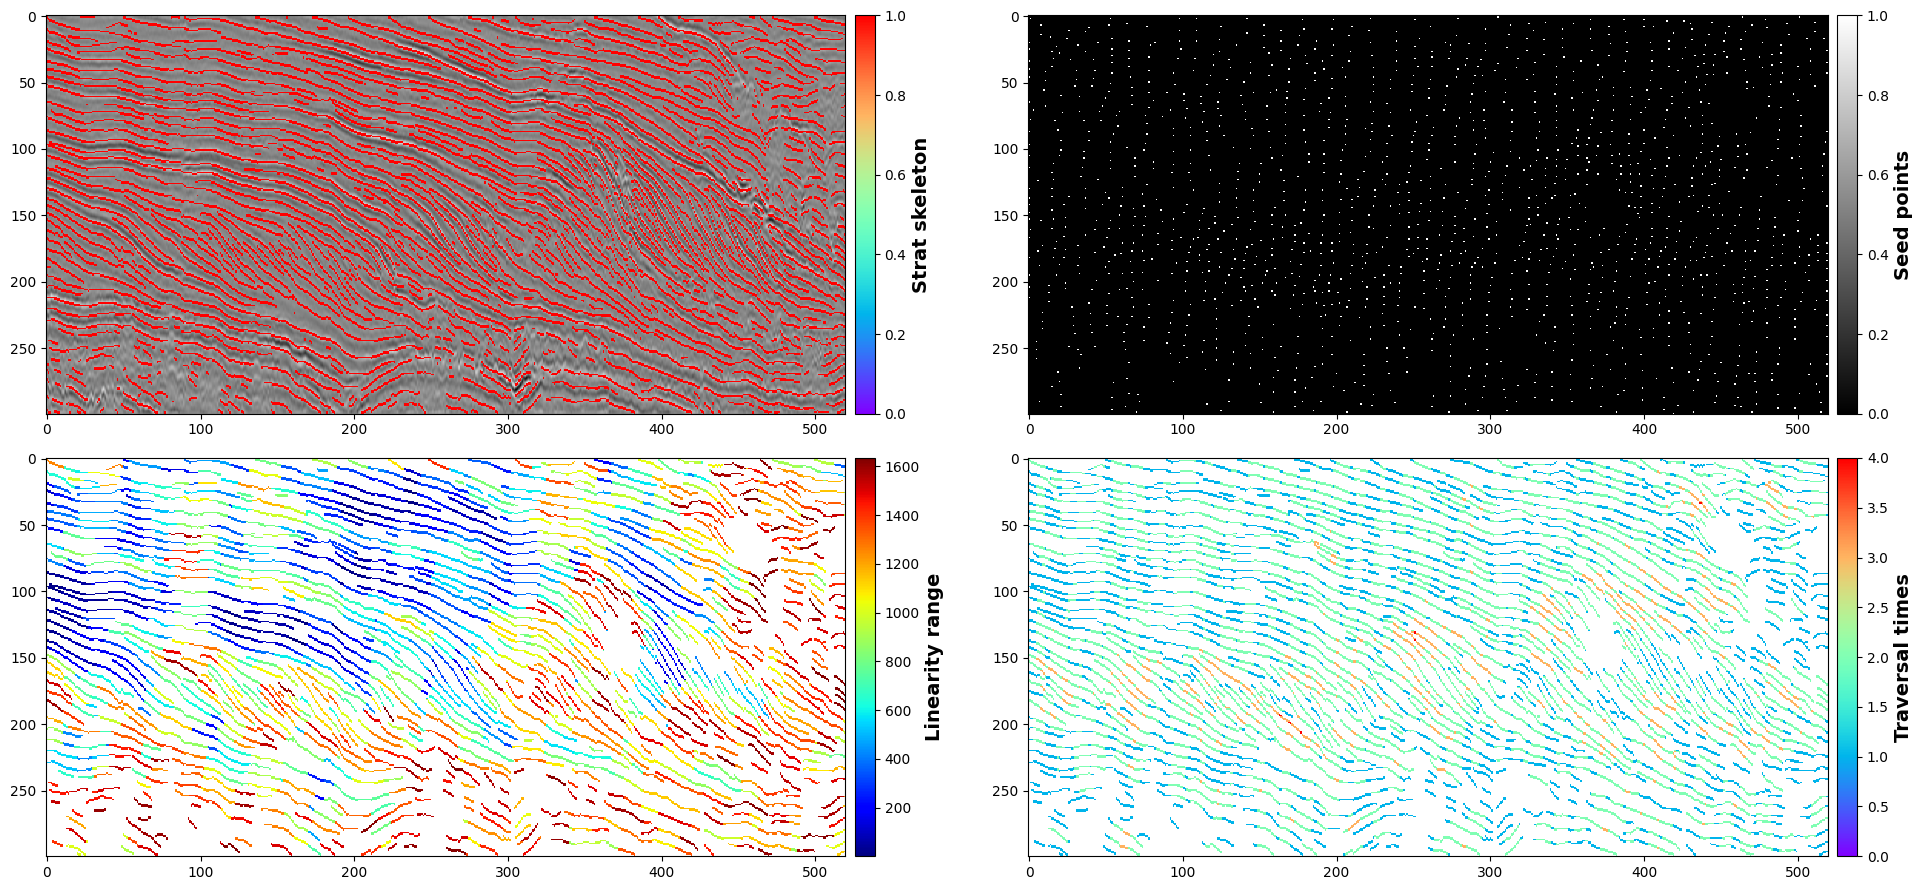

In [6]:
# file_path = "../synthetic/syn_datasets"
file_path = "../field/Beagle_datasets"
# file_path = "../field/Poseidon_datasets"
# file_path = "../field/F3_datasets"

sx = np.load(file_path+"_cigfacies/0.npy",allow_pickle=True).item()["seis"]
gx = np.load(file_path+"_cigfacies/0.npy",allow_pickle=True).item()["cigfacies"]
seed = np.load(file_path+"_seeds/0.npy",allow_pickle=True).item()["seeds"]
path = np.load(file_path+"_localhorizon/0.npy",allow_pickle=True).item()

sx_seeds = np.zeros_like(sx)
sx_path = np.zeros_like(sx)
sx_path2 = np.zeros_like(sx)

for i in range(len(path)):
    si = seed[i].astype(np.int16)
    sx_seeds[si[0],si[1]]=1
    pi = path[str(i)]
    for pxi,pyi in pi:
        sx_path[pxi,pyi]=i
        sx_path2[pxi,pyi]+=1

plt.figure(figsize=(20,9)) 
plt.subplot(2,2,1)
plt.imshow(sx,cmap="gray",aspect="auto")
gx[gx==0]=np.nan
plt.imshow(gx,cmap="rainbow",vmin=0,vmax=1,interpolation="nearest",aspect="auto")
cbar=plt.colorbar(pad=0.01)
cbar.set_label("Strat skeleton",fontsize=14,fontweight='bold')
plt.subplot(2,2,2)
plt.imshow(sx_seeds,cmap="gray",interpolation="nearest",aspect="auto")
cbar = plt.colorbar(pad=0.01)
cbar.set_label("Seed points",fontsize=14,fontweight='bold')
plt.subplot(2,2,3)
sx_path[sx_path==0]=np.nan
plt.imshow(sx_path,cmap="jet",interpolation="nearest",aspect="auto")
cbar = plt.colorbar(pad=0.01)
cbar.set_label("Linearity range",fontsize=14,fontweight='bold')
plt.subplot(2,2,4)
sx_path2[sx_path2==0]=np.nan
plt.imshow(sx_path2,cmap="rainbow",vmin=0,vmax=np.nanmax(sx_path2),interpolation="nearest",aspect="auto")
cbar = plt.colorbar(pad=0.01)
cbar.set_label("Traversal times",fontsize=14,fontweight='bold')
plt.tight_layout()